In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NITT datasets/OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv')

In [ ]:
pd.set_option('display.max_columns',None)
pd.options.display.max_rows = None

In [ ]:
data.shape

(352, 82)

In [ ]:
data.isna().sum().sum()/(131*124)

0.5544816547648362

In [ ]:
data.head(1)

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with yo

In [ ]:
a = data.isna().sum()
print((100*(a/len(data))))

*Are you self-employed?*                                                                                                                                                                                                              0.000000
How many employees does your company or organization have?                                                                                                                                                                           13.636364
Is your employer primarily a tech company/organization?                                                                                                                                                                              13.636364
Is your primary role within your company related to tech/IT?                                                                                                                                                                         13.636364
Does your employer provide mental health ben

In [ ]:
list(data)

['*Are you self-employed?*',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel more comfortable talking to your cowo

In [ ]:
data.drop(columns=[
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'Have you ever discussed your mental health with your employer?',
 'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.',
 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'Have you ever discussed your mental health with coworkers?',
 'Describe the conversation with coworkers you had about your mental health including their reactions.',
 "Have you ever had a coworker discuss their or another coworker's mental health with you?",
 'Describe the conversation your coworker had with you about their mental health (please do not use names).',
 'Overall, how much importance does your employer place on physical health?',
 'Overall, how much importance does your employer place on mental health?',
 'Do you know local or online resources to seek help for a mental health issue?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
 'Do you believe your productivity is ever affected by a mental health issue?',
 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
 '*Do you have previous employers?*',
 'Was your employer primarily a tech company/organization?',
 'Have your previous employers provided mental health benefits?',
 'Were you aware of the options for mental health care provided by your previous employers?',
 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
 'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
 'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?',
 'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
 'Did you ever discuss your mental health with your previous employer?',
 'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.',
 'Would you have been willing to discuss your mental health with your coworkers at previous employers?',
 'Did you ever discuss your mental health with a previous coworker(s)?',
 'Describe the conversation you had with your previous coworkers about your mental health including their reactions.',
 "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
 'Describe the conversation your coworker had with you about their mental health (please do not use names)..1',
 'Overall, how much importance did your previous employer place on physical health?',
 'Overall, how much importance did your previous employer place on mental health?',
 '*What disorder(s) have you been diagnosed with?*',
 '*If possibly, what disorder(s) do you believe you have?*',
 '*If so, what disorder(s) were you diagnosed with?*',
 'Have you had a mental health disorder in the past?',
 'If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*',
 'If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*',
 'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
 'How willing would you be to share with friends and family that you have a mental illness?',
 'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your *mental* health with a potential employer in an interview?',
 'Why or why not?.1',
 'Are you openly identified at work as a person with a mental health issue?',
 'Has being identified as a person with a mental health issue affected your career?',
 'How has it affected your career?',
 'If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the supportive or well handled response.',
 'Overall, how well do you think the tech industry supports employees with mental health issues?',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
 'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.',
 'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)',
 'What US state or territory do you *live* in?',
 'What is your race?',
 'What US state or territory do you *work* in?'
], inplace=True , axis=1)

In [ ]:
data.columns

Index(['*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
       'Do you *currently* have a mental health disorder?',
       'Have you ever been *diagnosed* with a mental health disorder?',
       'Have you ever sought treatment for a mental health disorder from a mental health professional?',
       'Do you have a family history of mental illness?', 'What is your age?',
       'What is your gender?', 'What country do you *live* in?',
       'What

In [ ]:
data.shape

(352, 15)

In [ ]:
data.columns = ['Self-employed?', 'Num. Employees', 'Tech company?',
               'Tech related role?', 'M-H benefits?','Workplace Discussion?','Medical Coverage?',
                'Current illness', 'Previously diagnosed?','Sought help?',
                'Illness history?', 'Age', 'Gender', 'Live Country',
                   'Work Country']

In [ ]:
data.isna().sum().sort_values()

Self-employed?             0
Current illness            0
Sought help?               0
Illness history?           0
Age                        0
Live Country               0
Work Country               0
Gender                     5
Num. Employees            48
Tech company?             48
Tech related role?        48
M-H benefits?             48
Workplace Discussion?     48
Previously diagnosed?    205
Medical Coverage?        304
dtype: int64

In [ ]:
data = data[data['Tech related role?'].notna()]
data.isna().sum().sort_values()

Self-employed?             0
Num. Employees             0
Tech company?              0
Tech related role?         0
M-H benefits?              0
Workplace Discussion?      0
Current illness            0
Sought help?               0
Illness history?           0
Age                        0
Live Country               0
Work Country               0
Gender                     5
Previously diagnosed?    173
Medical Coverage?        304
dtype: int64

In [ ]:
data['Tech related role?'].value_counts()

True     282
False     22
Name: Tech related role?, dtype: int64

In [ ]:
data.drop(data[data['Tech related role?'] == 0.0].index, inplace=True)

<ipython-input-17-ba98e51a1d21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Tech related role?'] == 0.0].index, inplace=True)


In [ ]:
data['Tech related role?'].value_counts()

True    282
Name: Tech related role?, dtype: int64

In [ ]:
data.drop(columns='Tech related role?',inplace=True)

<ipython-input-19-b4424e94193c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='Tech related role?',inplace=True)


In [ ]:
data['Gender'] = data['Gender'].fillna('Other')

In [ ]:
data['Gender'] = data['Gender'].str.lower().str.strip()
data['Gender'].value_counts()

male                                   164
female                                  56
m                                       18
f                                       10
other                                    5
woman                                    4
agender                                  2
none                                     2
cis male                                 2
non-binary                               2
cis woman                                1
masculino                                1
trans man                                1
trans non-binary/genderfluid             1
femile                                   1
femmina                                  1
agender trans woman                      1
make                                     1
nonbinary                                1
questioning                              1
man                                      1
cishet male                              1
masculine                                1
non binary 

In [ ]:
data["Gender"].unique()

array(['male', 'm', 'female', 'other', 'f',
       'let\'s keep it simple and say "male"', 'non-binary',
       'identify as male', 'woman', 'non binary', 'masculine',
       'cishet male', 'none', 'nonbinary', 'agender', 'man',
       'questioning', 'cis male', 'cis woman', 'agender trans woman',
       'femmina', 'trans man', 'masculino', 'make',
       'trans non-binary/genderfluid', 'femile', 'female (cis)'],
      dtype=object)

In [ ]:
Male = ['male','m','let\'s keep it simple and say "male"','identify as male','masculine','man','masculino']
Female = ['female','f','woman','femmina','femile']
Other = ['other','non-binary','non binary','cishet male', 'none', 'nonbinary', 'agender','questioning', 'cis male', 'cis woman', 'agender trans woman','trans man','make','trans non-binary/genderfluid','female (cis)']

In [ ]:
data['Gender'] = data['Gender'].replace(Male,'M')
data['Gender'] = data['Gender'].replace(Female,'F')
data['Gender'] = data['Gender'].replace(Other,'O')

In [ ]:
data['Gender'].value_counts()

M    187
F     72
O     23
Name: Gender, dtype: int64

In [ ]:
data['M-H benefits?'].value_counts()

Yes                               149
I don't know                       82
No                                 34
Not eligible for coverage / NA     17
Name: M-H benefits?, dtype: int64

In [ ]:
data.loc[data['M-H benefits?']=='Not eligible for coverage / NA' , 'M-H benefits?'] = 'No'

In [ ]:
data['Previously diagnosed?'].value_counts()

Yes    116
No       2
Name: Previously diagnosed?, dtype: int64

In [ ]:
data['Previously diagnosed?'].fillna('Unspecified',inplace = True)

In [ ]:
a = 100 * (data.isna().sum()) / len(data)
print( 'Percentage of missing values for each column is\n')
a

Percentage of missing values for each column is



Self-employed?             0.0
Num. Employees             0.0
Tech company?              0.0
M-H benefits?              0.0
Workplace Discussion?      0.0
Medical Coverage?        100.0
Current illness            0.0
Previously diagnosed?      0.0
Sought help?               0.0
Illness history?           0.0
Age                        0.0
Gender                     0.0
Live Country               0.0
Work Country               0.0
dtype: float64

In [ ]:
data.loc[data['M-H benefits?']=='Yes', 'Medical Coverage?'] = 'Yes'

In [ ]:
data.loc[data['Live Country']=='United Kingdom', 'Medical Coverage?'] = 'Yes'

In [ ]:
US_total = data.loc[data['Live Country']=='United States of America']
print('Amount of USA residents :{}'.format(len(US_total)))

Amount of USA residents :168


In [ ]:
US_nan = data.loc[(data['Medical Coverage?'].isna()) & (data['Live Country']=='United States of America')]
print('Amount of USA residents without Medical coverage provided by their employer :{}'.format(len(US_nan)))

#Percentage of uninsured
Uninsured = round(100*((len(US_nan)) / (len(US_total))), 2)

print('This is ' + str(Uninsured) + '%')

Amount of USA residents without Medical coverage provided by their employer :65
This is 38.69%


In [ ]:
Nan_list = list(US_nan.index)
Random_samples = random.sample(Nan_list,4)
(Random_samples.sort())
print(Random_samples)
type(Random_samples)

[22, 102, 258, 346]


list

In [ ]:
for i in Random_samples:
  data.at[i, 'Medical Coverage?'] = 'No'

In [ ]:
data.loc[(data['Live Country']=='United States of America') & (data['Medical Coverage?'].isna()) , 'Medical Coverage?'] = 'Yes'

In [ ]:
data['Medical Coverage?'].isna().sum()

57

In [ ]:
data['Live Country'].value_counts()

United States of America    168
United Kingdom               25
Portugal                     16
Brazil                       13
India                        12
Canada                       10
Norway                        5
Switzerland                   4
Netherlands                   3
Germany                       3
Italy                         2
Poland                        2
Spain                         2
Turkey                        2
New Zealand                   2
Mexico                        2
Estonia                       1
Croatia                       1
Greece                        1
Pakistan                      1
South Africa                  1
Israel                        1
Hong Kong                     1
France                        1
Ireland                       1
Ghana                         1
Japan                         1
Name: Live Country, dtype: int64

In [ ]:
data.loc[(data['Live Country']=='Germany') | (data['Live Country']=='France') | (data['Live Country']=='Canada') |
         (data['Live Country']=='Spain') | (data['Live Country']=='Netherlands')
         , 'Medical Coverage?'] = 'Yes'

In [ ]:
data['Medical Coverage?'].isna().sum()

48

In [ ]:
data['Self-employed?'] = data['Self-employed?'].replace({1 : 'Yes' , 0 : 'No'})

In [ ]:
data['Tech company?'] = data['Tech company?'].replace({1.0 : 'Yes' , 0.0 : 'No'})

In [ ]:
data['Sought help?'] = data['Sought help?'].replace({1 : 'Yes' , 0 : 'No'})

In [ ]:
data['Age'].describe()

count    282.000000
mean      34.996454
std        8.677495
min        0.000000
25%       28.000000
50%       34.000000
75%       40.000000
max       63.000000
Name: Age, dtype: float64

In [ ]:
age_min = data['Age'].min()
age_max = data['Age'].max()

bins = np.linspace(age_min, age_max, 10)
labels = ['G1','G2','G3','G4','G5','G6','G7','G8','G9']
bins

array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63.])

In [ ]:
data['Age'] = pd.cut(x=data['Age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
column_names = list(data.columns)

In [ ]:
for col in column_names:
    data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 351
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Self-employed?         282 non-null    category
 1   Num. Employees         282 non-null    category
 2   Tech company?          282 non-null    category
 3   M-H benefits?          282 non-null    category
 4   Workplace Discussion?  282 non-null    category
 5   Medical Coverage?      234 non-null    category
 6   Current illness        282 non-null    category
 7   Previously diagnosed?  282 non-null    category
 8   Sought help?           282 non-null    category
 9   Illness history?       282 non-null    category
 10  Age                    282 non-null    category
 11  Gender                 282 non-null    category
 12  Live Country           282 non-null    category
 13  Work Country           282 non-null    category
dtypes: category(14)
memory usage: 18.5 KB


In [ ]:
data.nunique()

Self-employed?            1
Num. Employees            6
Tech company?             2
M-H benefits?             3
Workplace Discussion?     3
Medical Coverage?         2
Current illness           4
Previously diagnosed?     3
Sought help?              2
Illness history?          3
Age                       8
Gender                    3
Live Country             27
Work Country             28
dtype: int64

In [ ]:
data['Self-employed?'].unique()

[False]
Categories (1, bool): [False]

In [ ]:
data.drop(columns='Self-employed?', inplace=True)

<Axes: title={'center': 'Distribution of different age groups'}, xlabel='Age groups', ylabel='Number of individuals'>

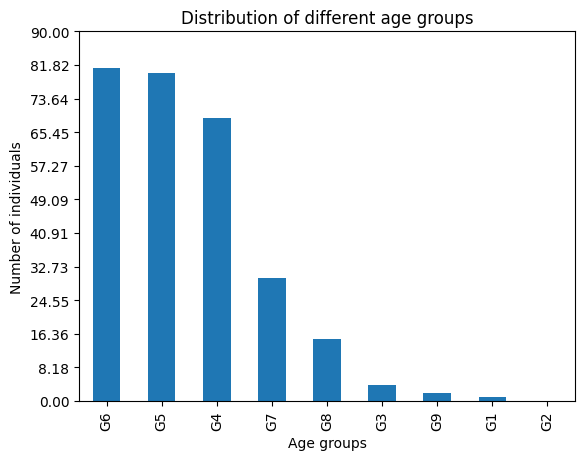

In [ ]:
data['Age'].value_counts().plot(kind='bar',xlabel='Age groups',ylabel='Number of individuals',
                                title='Distribution of different age groups', yticks=np.linspace(0,90,12))

In [ ]:
data2 = pd.get_dummies(data, drop_first=True)

In [ ]:
print(data2.shape)
data2.columns

(282, 82)


Index(['Num. Employees_100-500', 'Num. Employees_26-100',
       'Num. Employees_500-1000', 'Num. Employees_6-25',
       'Num. Employees_More than 1000', 'Tech company?_Yes',
       'M-H benefits?_No', 'M-H benefits?_Yes', 'Workplace Discussion?_No',
       'Workplace Discussion?_Yes', 'Medical Coverage?_Yes',
       'Current illness_No', 'Current illness_Possibly', 'Current illness_Yes',
       'Previously diagnosed?_Unspecified', 'Previously diagnosed?_Yes',
       'Sought help?_True', 'Illness history?_No', 'Illness history?_Yes',
       'Age_G2', 'Age_G3', 'Age_G4', 'Age_G5', 'Age_G6', 'Age_G7', 'Age_G8',
       'Age_G9', 'Gender_M', 'Gender_O', 'Live Country_Canada',
       'Live Country_Croatia', 'Live Country_Estonia', 'Live Country_France',
       'Live Country_Germany', 'Live Country_Ghana', 'Live Country_Greece',
       'Live Country_Hong Kong', 'Live Country_India', 'Live Country_Ireland',
       'Live Country_Israel', 'Live Country_Italy', 'Live Country_Japan',
       'Liv

In [ ]:
X = data2.drop('Current illness_Yes', axis=1)
y = data2['Current illness_Yes']

In [ ]:
#Categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Num. Employees_100-500: 0.175464
 Num. Employees_26-100: 0.384980
 Num. Employees_500-1000: 0.350856
 Num. Employees_6-25: 0.125145
 Num. Employees_More than 1000: 0.122841
 Tech company?_Yes: 0.369626
 M-H benefits?_No: 0.009338
 M-H benefits?_Yes: 5.140547
 Workplace Discussion?_No: 0.792568
 Workplace Discussion?_Yes: 0.627842
 Medical Coverage?_Yes: 1.075576
 Current illness_No: 59.719512
 Current illness_Possibly: 43.890244
 Previously diagnosed?_Unspecified: 118.000000
 Previously diagnosed?_Yes: 161.220339
 Sought help?_True: 34.347476
 Illness history?_No: 15.564532
 Illness history?_Yes: 7.653164
 Age_G2: nan
 Age_G3: 1.806997
 Age_G4: 0.208782
 Age_G5: 2.153702
 Age_G6: 1.322861
 Age_G7: 1.627367
 Age_G8: 0.020959
 Age_G9: 1.439024
 Gender_M: 4.461207
 Gender_O: 3.421186
 Live Country_Canada: 0.273357
 Live Country_Croatia: 0.719512
 Live Country_Estonia: 0.719512
 Live Country_France: 0.719512
 Live Country_Germany: 0.089293
 Live Country_Ghana: 0.719512
 Live Country_Greec

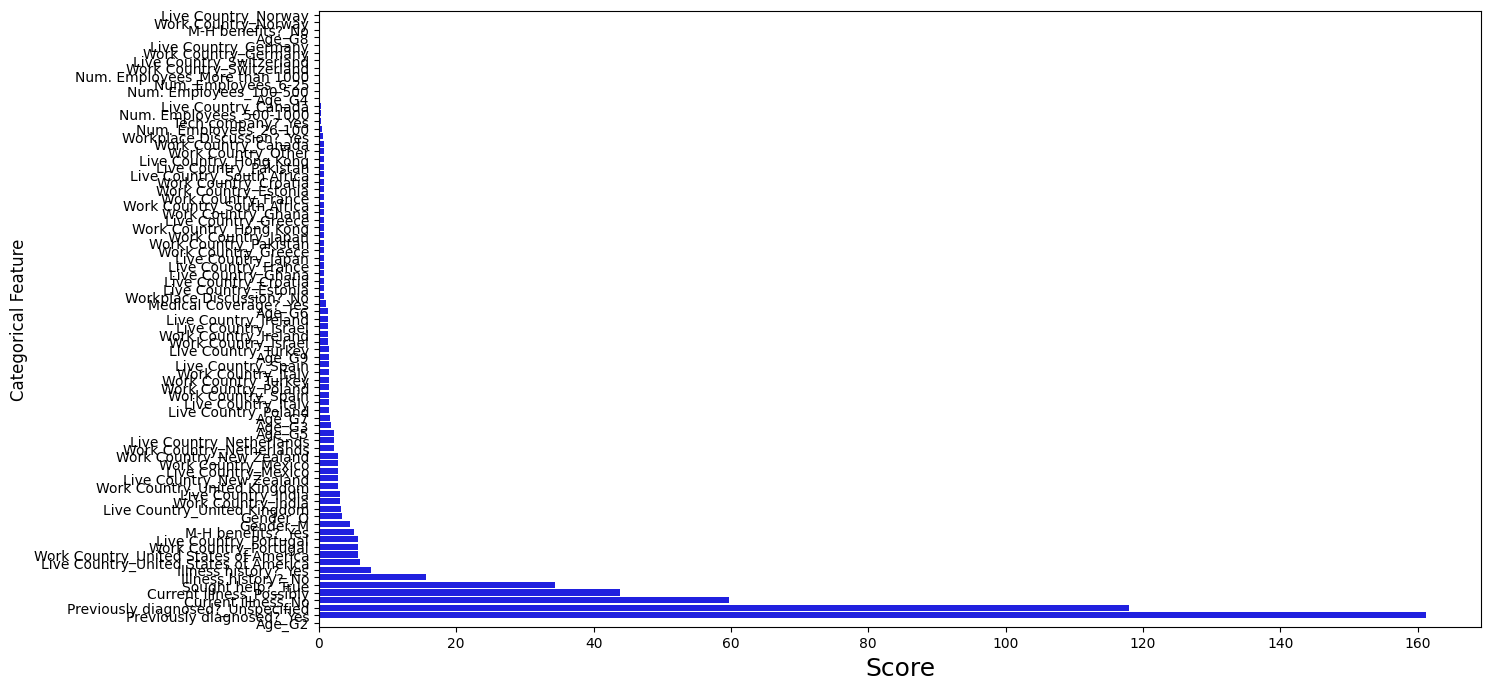

In [ ]:
datset = pd.DataFrame()
datset['feature'] = X.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)

#Create barplot
plt.figure(figsize=(15,8))
sns.barplot(x=datset['scores'], y=datset['feature'], color='blue')
#Set style attributes
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
X1 = data.drop('Current illness', axis=1)
y1 = data['Current illness']

In [ ]:
oe = OrdinalEncoder()
oe.fit(X1)
X_enc = oe.transform(X1)

#Prepare target variable
#Label encoder is used to encode the output, or target variable,
#  in this case if the entry individual has a current mental illness or not
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

In [ ]:
print(X_enc.shape)
X_enc

(282, 12)


array([[ 2.,  1.,  0., ...,  1., 26., 27.],
       [ 2.,  1.,  2., ...,  1., 26., 27.],
       [ 2.,  1.,  0., ...,  1., 26., 27.],
       ...,
       [ 5.,  0.,  0., ...,  1.,  9.,  9.],
       [ 5.,  1.,  1., ...,  0.,  9.,  9.],
       [ 5.,  1.,  2., ...,  2., 26., 27.]])

In [ ]:
print(y_enc.shape)
y_enc

(282,)


array([0, 2, 1, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 2, 2, 3, 1, 3, 2, 1, 3, 3,
       2, 3, 3, 2, 1, 2, 3, 0, 2, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 1, 2, 1,
       2, 1, 1, 2, 0, 3, 1, 0, 2, 3, 2, 3, 2, 1, 2, 3, 1, 1, 2, 2, 1, 2,
       3, 1, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 1, 3, 2, 0, 1, 3, 2, 1, 3, 3,
       1, 2, 3, 2, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 0, 1, 3, 2, 1, 1,
       3, 3, 3, 3, 2, 1, 3, 0, 1, 3, 1, 2, 3, 1, 3, 2, 1, 1, 3, 1, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 2, 3, 1, 1, 3, 1,
       0, 1, 2, 2, 1, 2, 2, 1, 3, 0, 1, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 2, 0, 2, 3, 3, 3, 1, 3, 2, 0, 2, 1, 3, 1, 2, 3, 3, 0, 3, 1, 1,
       3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 2, 2, 0, 2, 1, 0, 0, 3, 3, 3, 3, 3,
       3, 2, 3, 1, 2, 3, 3, 1, 3, 2, 1, 3, 3, 3, 2, 1, 3, 3, 1, 1, 3, 3,
       1, 3, 1, 0, 1, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 3, 3, 1, 0, 1, 3, 2,
       3, 3, 1, 2, 3, 1, 1, 1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3])

In [ ]:
np.any(np.isnan(X_enc))

True

In [ ]:
X_enc[np.isnan(X_enc)] = 0

In [ ]:
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)

#Print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

 Num. Employees: 2.241869
 Tech company?: 0.485691
 M-H benefits?: 12.689886
 Workplace Discussion?: 0.964873
 Medical Coverage?: 1.172273
 Previously diagnosed?: 45.611710
 Sought help?: 36.625687
 Illness history?: 4.150996
 Age: 5.363607
 Gender: 0.615792
 Live Country: 21.667333
 Work Country: 20.510915


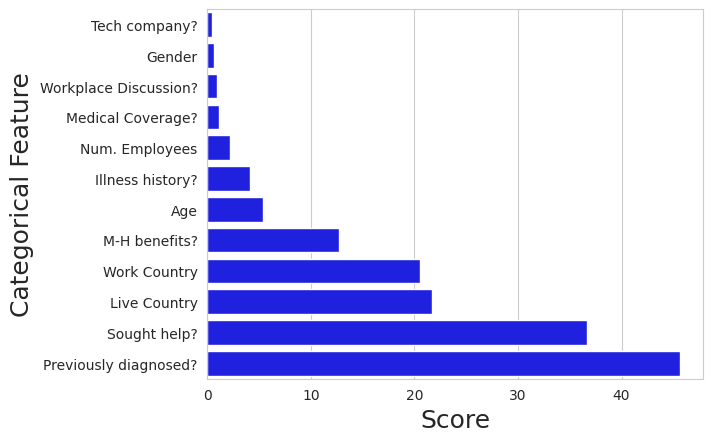

In [ ]:
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)

#Create barplot
sns.barplot(x=datset1['scores'], y=datset1['feature'], color='blue')
#Set style
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
stop

In [ ]:
data.drop(columns=['Workplace Discussion?','Tech company?'],
          inplace=True)

In [ ]:
data.to_csv('Data_2019.csv')

In [ ]:
df = pd.read_csv('/content/Data_2019.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
df

,Num. Employees,M-H benefits?,Medical Coverage?,Current illness,Previously diagnosed?,Sought help?,Illness history?,Age,Gender,Live Country,Work Country
0,26-100,I don't know,Yes,Don't Know,Unspecified,False,No,G4,M,United States of America,United States of America
1,26-100,Yes,Yes,Possibly,Unspecified,False,Yes,G8,M,United States of America,United States of America
2,26-100,I don't know,Yes,No,Unspecified,False,I don't know,G4,M,United States of America,United States of America
3,100-500,I don't know,Yes,No,Unspecified,False,Yes,G6,M,United States of America,United States of America
4,26-100,I don't know,Yes,No,Unspecified,False,No,G7,M,United States of America,United States of America
5,26-100,Yes,Yes,Yes,Yes,True,Yes,G6,F,United States of America,United States of America
6,26-100,Yes,Yes,No,Unspecified,False,No,G7,O,United Kingdom,United Kingdom
7,6-25,I don't know,Yes,Possibly,Unspecified,True,I don't know,G7,M,United Kingdom,United Kingdom
8,100-500,Yes,Yes,Possibly,Unspecified,True,No,G6,M,United Kingdom,United Kingdom
9,More than 1000,I don't know,Yes,Possibly,Unspecified,True,Yes,G5,M,United States of America,United States of America


In [ ]:
df.to_csv('Data_2020.csv')